In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys, os
sys.path.append(os.path.abspath('..')) 

In [14]:
# Load datasets
studentRegistration = pd.read_csv('../data/studentRegistration.csv')
studentInfo = pd.read_csv('../data/studentInfo.csv')
studentVle = pd.read_csv('../data/vle.csv')
studentAssessment = pd.read_csv('../data/studentAssessment.csv')
courses = pd.read_csv('../data/courses.csv')
vle = pd.read_csv('../data/vle.csv')
assessments = pd.read_csv('../data/assessments.csv')

In [16]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [17]:
studentRegistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [18]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [19]:
studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

We have 45 NaN value in the date of registration we should handle them. The unregistration date is not that important so we can delete it.

In [20]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [21]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [22]:
from src.data_exploration import summarize_datasets, global_summary

In [23]:
datasets = {
    "studentRegistration": pd.read_csv("../data/studentRegistration.csv"),
    "studentInfo": pd.read_csv("../data/studentInfo.csv"),
    "studentVle": pd.read_csv("../data/studentVle.csv"),
    "studentAssessment": pd.read_csv("../data/studentAssessment.csv"),
    "courses": pd.read_csv("../data/courses.csv"),
    "vle": pd.read_csv("../data/vle.csv"),
    "assessments": pd.read_csv("../data/assessments.csv"),
}

summary_df = summarize_datasets(datasets)




 studentRegistration
----------------------
Shape: 32593 rows × 5 cols
Missing values per column:
date_unregistration    22521
date_registration         45
dtype: int64

 studentInfo
--------------
Shape: 32593 rows × 12 cols
Missing values per column:
imd_band    1111
dtype: int64

 studentVle
-------------
Shape: 10655280 rows × 6 cols
Missing values per column:
Series([], dtype: int64)

 studentAssessment
--------------------
Shape: 173912 rows × 5 cols
Missing values per column:
score    173
dtype: int64

 courses
----------
Shape: 22 rows × 3 cols
Missing values per column:
Series([], dtype: int64)

 vle
------
Shape: 6364 rows × 6 cols
Missing values per column:
week_from    5243
week_to      5243
dtype: int64

 assessments
--------------
Shape: 206 rows × 6 cols
Missing values per column:
date    11
dtype: int64


,Rows,Columns,Total NaN,% NaN
Dataset,,,,
studentRegistration,32593,5,22566,13.85
studentInfo,32593,12,1111,0.28
studentVle,10655280,6,0,0.00
studentAssessment,173912,5,173,0.02
courses,22,3,0,0.00
vle,6364,6,10486,27.46
assessments,206,6,11,0.89


/Users/myriam/Desktop/Data Mining /projet/oulad-network-exploration/src/data_exploration.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


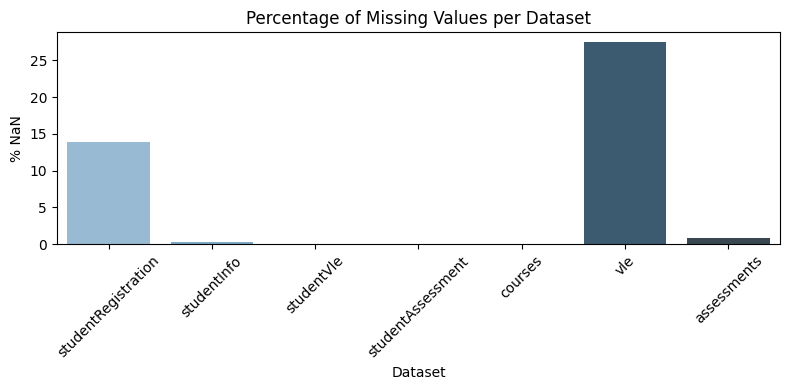

In [24]:
global_summary(summary_df)

According to the graph there is some missing values but before we handle that we will merge the data first

In [4]:
import pandas as pd
import numpy as np

dataframes = {
    'studentRegistration': studentRegistration,
    'studentInfo': studentInfo,
    'studentVle': studentVle,
    'studentAssessment': studentAssessment,
    'courses': courses,
    'vle': vle,
    'assessments': assessments
}

# Liste pour stocker les DataFrames de synthèse pour chaque fichier
summary_list = []

# Itération sur chaque DataFrame
for name, df in dataframes.items():
    print(f"--- Traitement du DataFrame : **{name}** ---")

    # 1. Calculer le nombre de valeurs manquantes (nulles)
    missing_count = df.isnull().sum()

    # 2. Calculer le pourcentage de valeurs manquantes
    missing_percentage = (missing_count / len(df)) * 100

    # 3. Récupérer le type de données (dtype)
    data_type = df.dtypes

    # 4. Créer un DataFrame de synthèse pour le fichier actuel
    summary_df = pd.DataFrame({
        'DataFrame': name,
        'Column': df.columns,
        'Dtype': data_type.values,
        'Missing_Count': missing_count.values,
        'Missing_%': missing_percentage.values.round(2)
    })
    
    # Ajouter la colonne 'Missing_Count' à la colonne 'Column' dans l'index
    summary_df = summary_df.set_index(['DataFrame', 'Column'])

    summary_list.append(summary_df)

# Concaténer tous les DataFrames de synthèse en un seul
full_summary_table = pd.concat(summary_list).reset_index()

# Afficher la table complète (triée par DataFrame et puis par nombre de valeurs manquantes descendant)
full_summary_table_sorted = full_summary_table.sort_values(
    by=['DataFrame', 'Missing_Count'], 
    ascending=[True, False]
)

print("\n\n*** 📊 TABLEAU DE SYNTHÈSE COMPLET DES DONNÉES ***")

full_summary_table_sorted

# Affichage des 15 premières lignes pour une vue rapide
# display(full_summary_table_sorted.head(15)) # si vous êtes dans un environnement notebook

--- Traitement du DataFrame : **studentRegistration** ---
--- Traitement du DataFrame : **studentInfo** ---
--- Traitement du DataFrame : **studentVle** ---
--- Traitement du DataFrame : **studentAssessment** ---
--- Traitement du DataFrame : **courses** ---
--- Traitement du DataFrame : **vle** ---
--- Traitement du DataFrame : **assessments** ---


*** 📊 TABLEAU DE SYNTHÈSE COMPLET DES DONNÉES ***


,DataFrame,Column,Dtype,Missing_Count,Missing_%
41,assessments,date,float64,11,5.34
37,assessments,code_module,object,0,0.00
38,assessments,code_presentation,object,0,0.00
39,assessments,id_assessment,int64,0,0.00
40,assessments,assessment_type,object,0,0.00
42,assessments,weight,float64,0,0.00
28,courses,code_module,object,0,0.00
29,courses,code_presentation,object,0,0.00
30,courses,module_presentation_length,int64,0,0.00
27,studentAssessment,score,float64,173,0.10


In [6]:
summary_list = []
for name, df in dataframes.items():
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    data_type = df.dtypes
    
    summary_df = pd.DataFrame({
        'DataFrame': name,
        'Column': df.columns,
        'Dtype': data_type.values,
        'Missing_Count': missing_count.values,
        'Missing_%': missing_percentage.values.round(2)
    })
    summary_list.append(summary_df.set_index(['DataFrame', 'Column']))

full_summary_table = pd.concat(summary_list).reset_index()
full_summary_table_sorted = full_summary_table.sort_values(
    by=['DataFrame', 'Missing_Count'], 
    ascending=[True, False]
)

full_summary_table_sorted



,DataFrame,Column,Dtype,Missing_Count,Missing_%
41,assessments,date,float64,11,5.34
37,assessments,code_module,object,0,0.00
38,assessments,code_presentation,object,0,0.00
39,assessments,id_assessment,int64,0,0.00
40,assessments,assessment_type,object,0,0.00
42,assessments,weight,float64,0,0.00
28,courses,code_module,object,0,0.00
29,courses,code_presentation,object,0,0.00
30,courses,module_presentation_length,int64,0,0.00
27,studentAssessment,score,float64,173,0.10


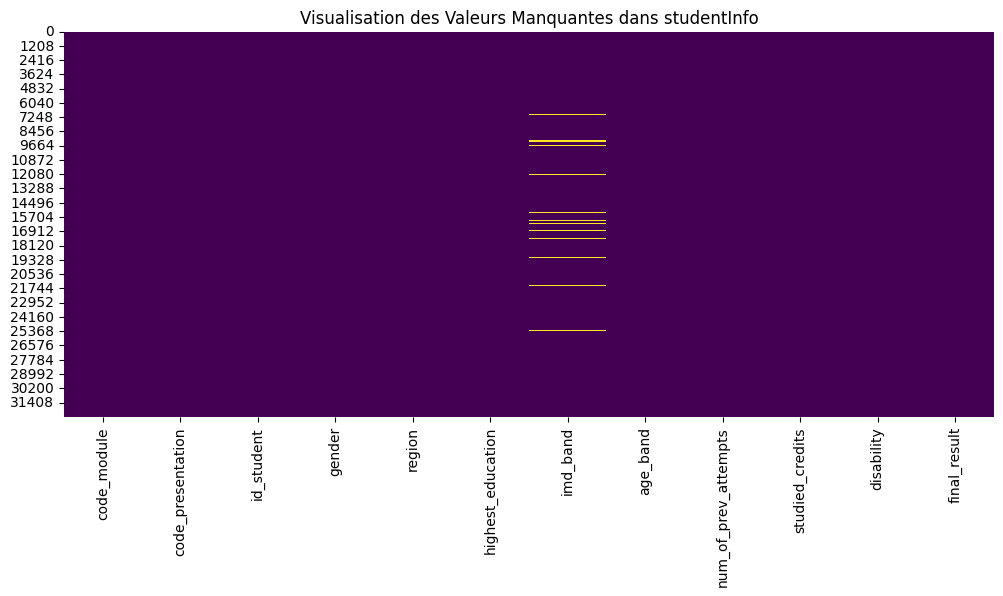

In [7]:
# Visualisation rapide des valeurs manquantes (pour le DataFrame 'studentInfo' qui a le plus de variables)
plt.figure(figsize=(12, 5))
sns.heatmap(studentInfo.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisation des Valeurs Manquantes dans studentInfo")
plt.show()






## 📊 3. Analyse Statistique Descriptive (Variables Numériques)

### StudentInfo (Statistiques Clés) ###
         id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05              0.163225        79.758691
std    5.491673e+05              0.479758        41.071900
min    3.733000e+03              0.000000        30.000000
25%    5.085730e+05              0.000000        60.000000
50%    5.903100e+05              0.000000        60.000000
75%    6.444530e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000

### Courses (Longueur du module) ###
       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000


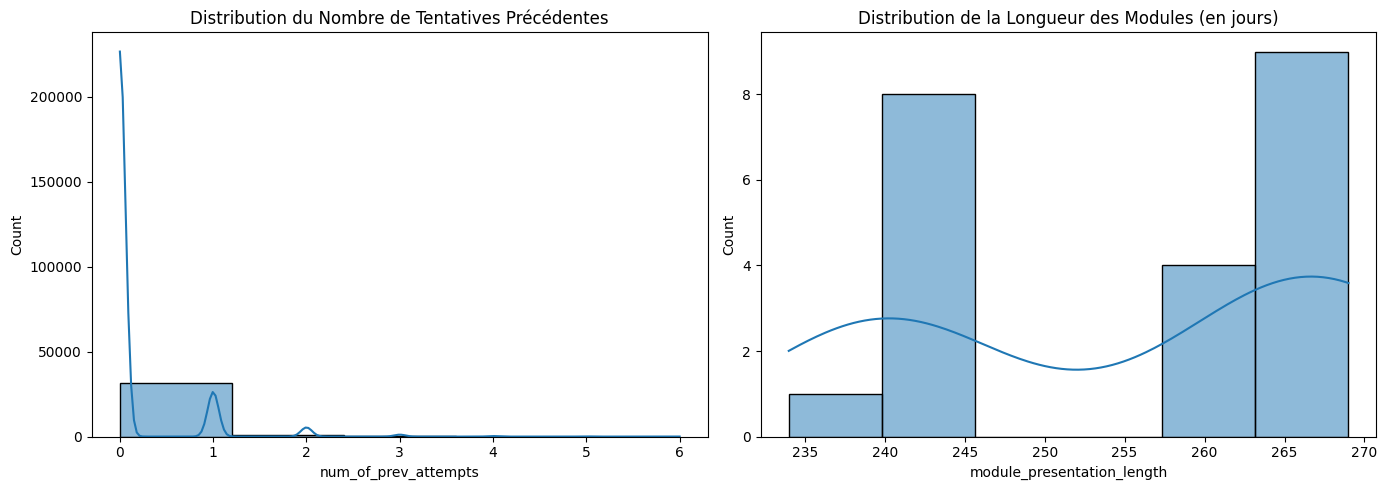

In [8]:
print("\n\n## 📊 3. Analyse Statistique Descriptive (Variables Numériques)\n")

# --- Analyse de studentInfo ---
print("### StudentInfo (Statistiques Clés) ###")
# Nous utilisons 'num_of_prev_attempts' comme exemple
numeric_cols_info = studentInfo.select_dtypes(include=np.number).columns
if len(numeric_cols_info) > 0:
    print(studentInfo[numeric_cols_info].describe())
else:
    print("Pas de colonnes numériques dans studentInfo pour cette analyse.")

# --- Analyse de courses ---
print("\n### Courses (Longueur du module) ###")
# 'module_presentation_length' est la durée en jours
print(courses[['module_presentation_length']].describe())

# --- Visualisation de la distribution ---
plt.figure(figsize=(14, 5))

# Exemple 1 : Nombre de tentatives précédentes
plt.subplot(1, 2, 1)
sns.histplot(studentInfo['num_of_prev_attempts'], bins=5, kde=True)
plt.title('Distribution du Nombre de Tentatives Précédentes')

# Exemple 2 : Longueur du module
plt.subplot(1, 2, 2)
sns.histplot(courses['module_presentation_length'], kde=True)
plt.title('Distribution de la Longueur des Modules (en jours)')

plt.tight_layout()
plt.show()

In [12]:
# Analyse statistique
# Distribution des variable de chaque dataset 
import pandas as pd
import numpy as np

# Regroupement des DataFrames pour un accès facile
dataframes = {
    'studentRegistration': studentRegistration,
    'studentInfo': studentInfo,
    'studentVle': studentVle,
    'studentAssessment': studentAssessment,
    'courses': courses,
    'vle': vle,
    'assessments': assessments
}

print("## 📊 Mesures de Tendance Centrale et de Dispersion (Statistiques Clés)\n")

stats_summary_list = []

# Itération sur les DataFrames
for name, df in dataframes.items():
    
    # Sélectionner uniquement les colonnes numériques
    numeric_df = df.select_dtypes(include=np.number)
    
    if not numeric_df.empty:
        # Utiliser la méthode describe() qui calcule toutes les mesures requises
        description = numeric_df.describe().transpose()[['mean', '50%', 'std', 'min', 'max']]
        
        # Renommer la colonne '50%' en 'median' pour plus de clarté
        description.rename(columns={'50%': 'median'}, inplace=True)
        
        # Ajouter une colonne d'identification du DataFrame
        description.insert(0, 'DataFrame', name)
        
        stats_summary_list.append(description)

# Concaténer tous les résultats en un seul tableau
full_stats_table = pd.concat(stats_summary_list).reset_index().rename(columns={'index': 'Column'})

full_stats_table



## 📊 Mesures de Tendance Centrale et de Dispersion (Statistiques Clés)



,Column,DataFrame,mean,median,std,min,max
0,id_student,studentRegistration,706687.669131,590310.0,549167.313855,3733.0,2716795.0
1,date_registration,studentRegistration,-69.411300,-57.0,49.260522,-322.0,167.0
2,date_unregistration,studentRegistration,49.757645,27.0,82.460890,-365.0,444.0
3,id_student,studentInfo,706687.669131,590310.0,549167.313855,3733.0,2716795.0
4,num_of_prev_attempts,studentInfo,0.163225,0.0,0.479758,0.0,6.0
5,studied_credits,studentInfo,79.758691,60.0,41.071900,30.0,655.0
6,id_site,studentVle,726099.094123,730096.5,128315.137473,526721.0,1077905.0
7,week_from,studentVle,15.204282,15.0,8.792865,0.0,29.0
8,week_to,studentVle,15.214987,15.0,8.779806,0.0,29.0
9,id_assessment,studentAssessment,26553.803556,25359.0,8829.784254,1752.0,37443.0




## 📦 Boîtes à Moustaches (Boxplots) pour la Détection d'Outliers



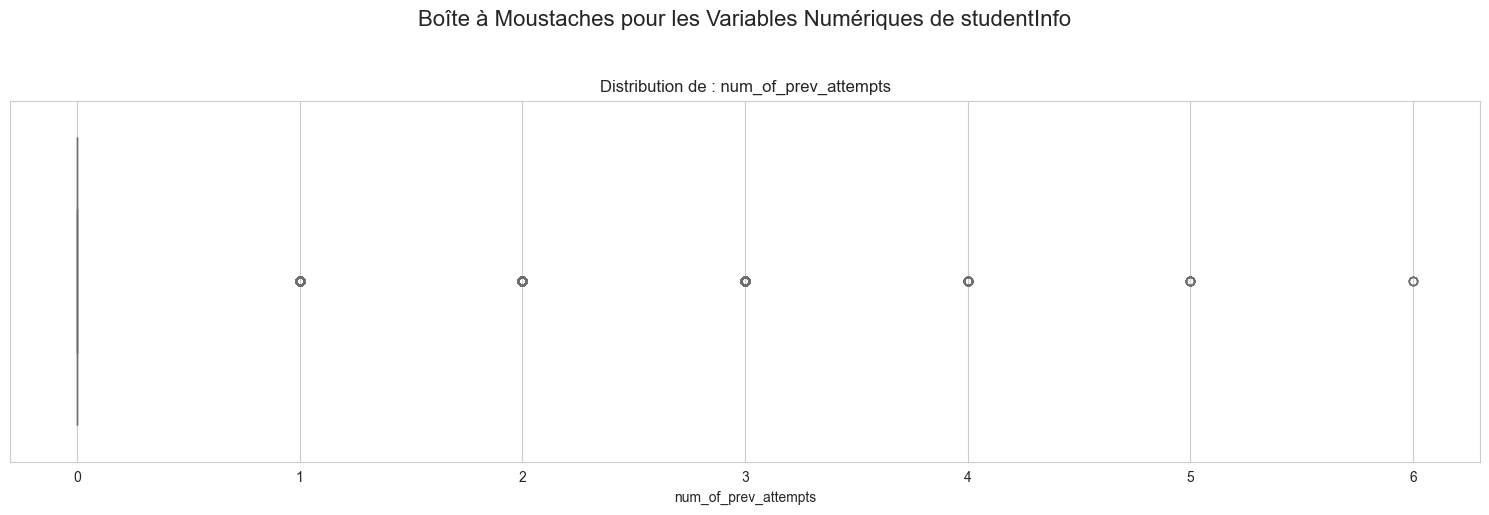

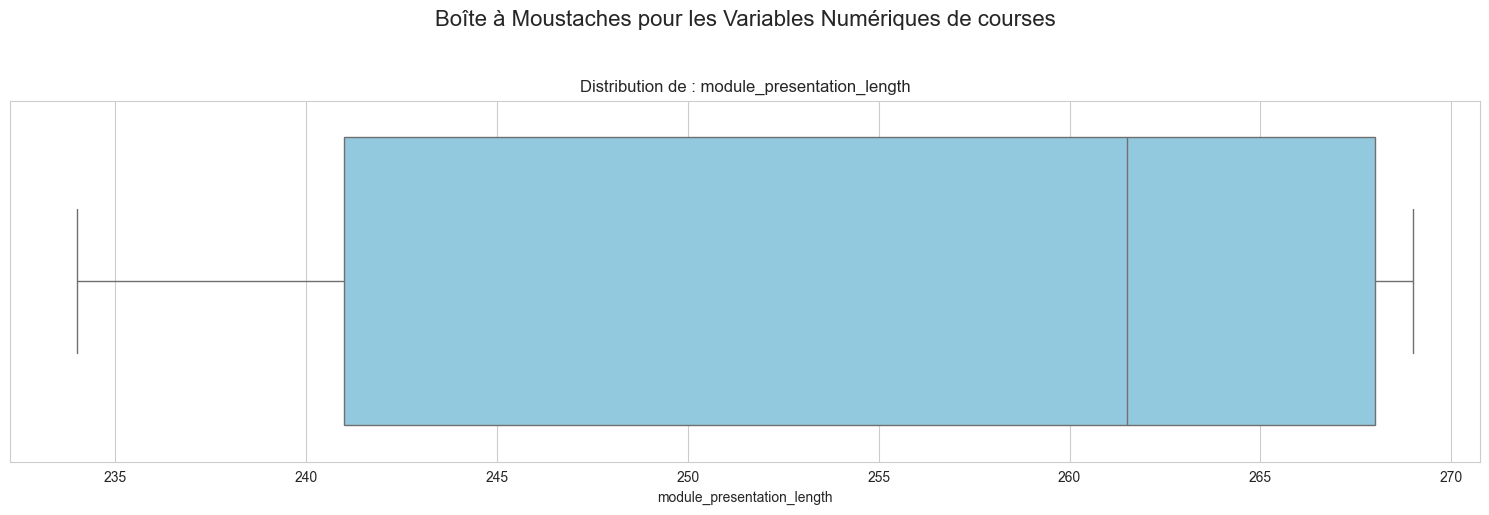

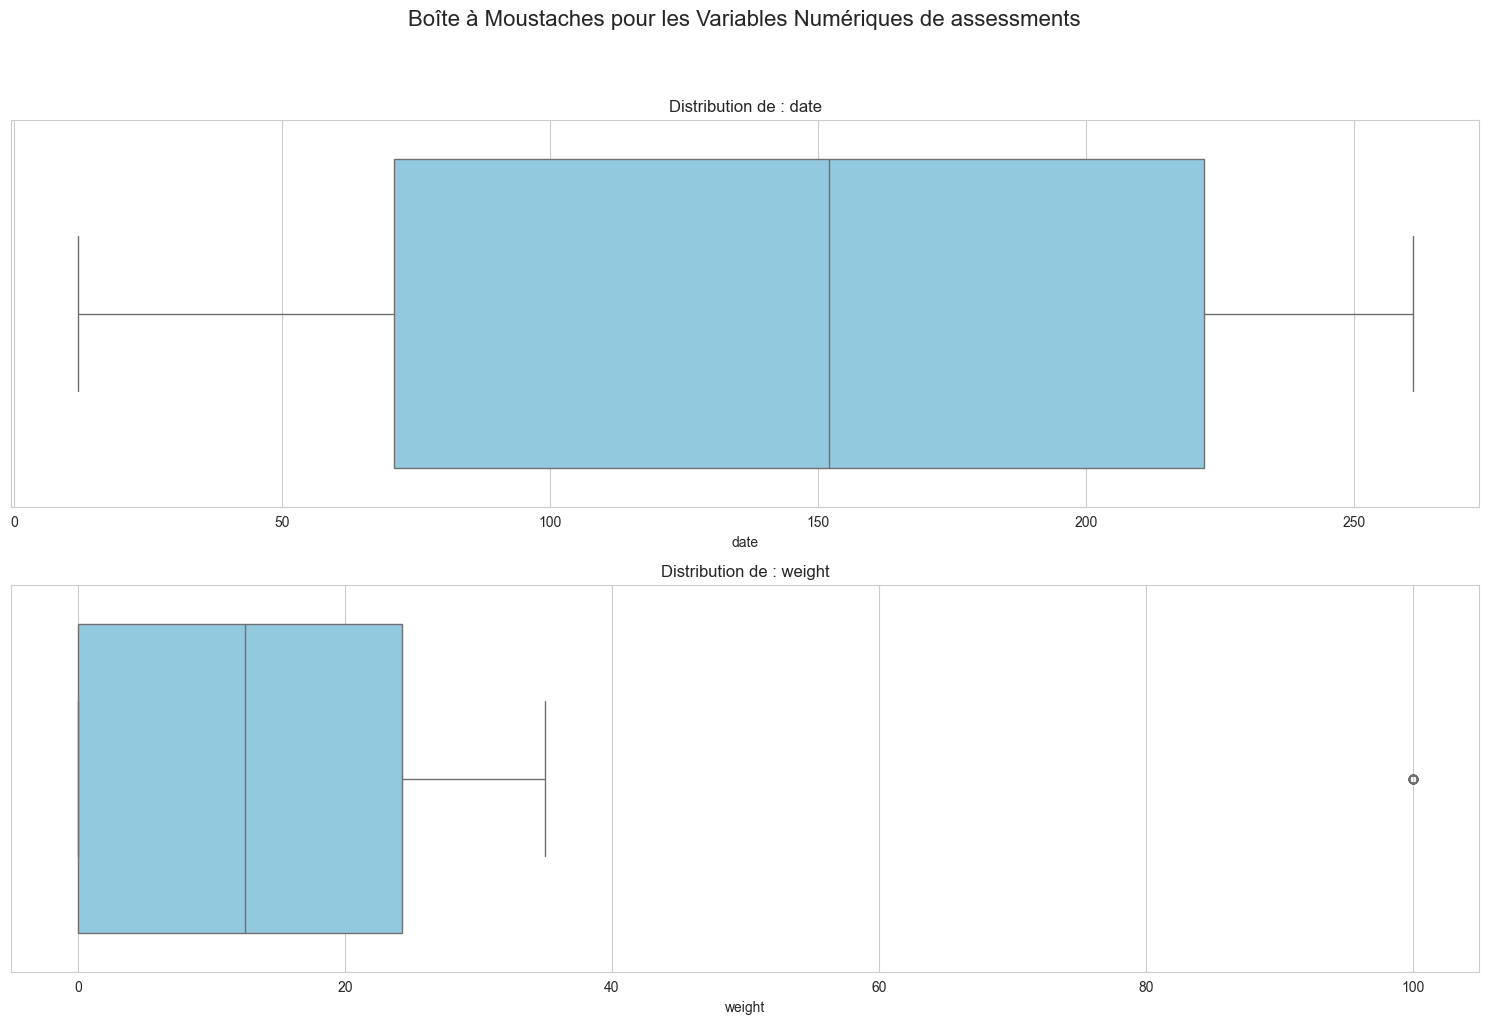

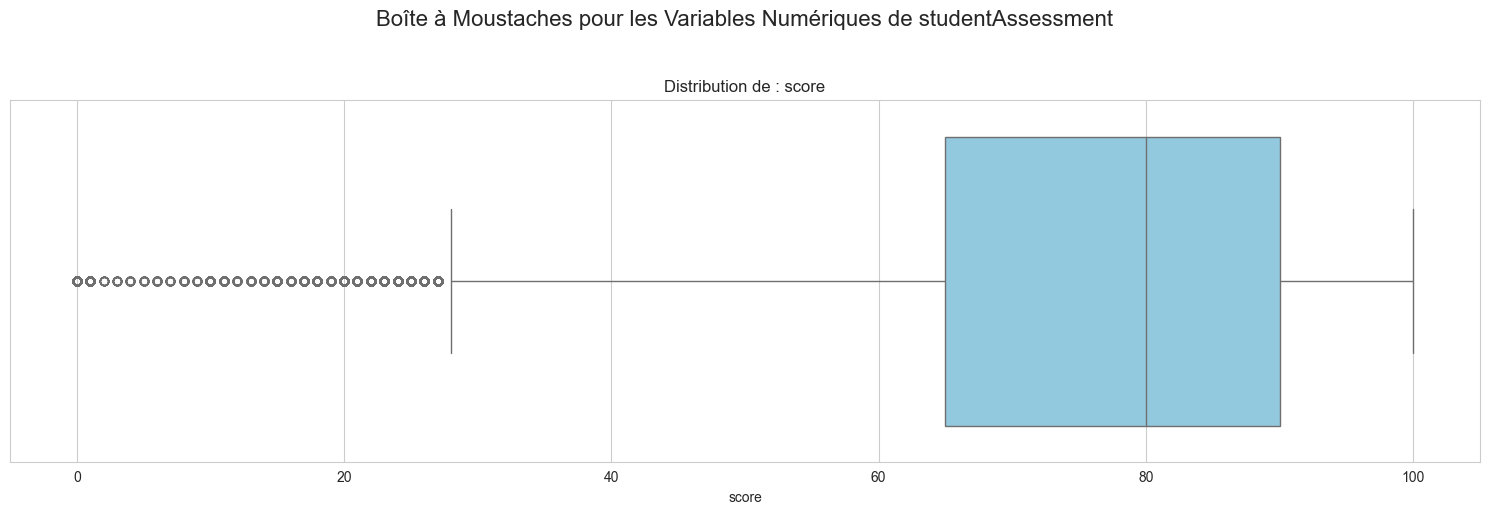

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6) 

print("\n\n## 📦 Boîtes à Moustaches (Boxplots) pour la Détection d'Outliers\n")

# Définir les colonnes numériques que nous voulons visualiser
# (excluant les IDs qui n'ont pas de signification quantitative)
numeric_cols_to_plot = {
    'studentInfo': ['num_of_prev_attempts'],
    'courses': ['module_presentation_length'],
    'assessments': ['date', 'weight'], 
    'studentAssessment': ['score']
}

for name, cols in numeric_cols_to_plot.items():
    df = dataframes[name]
    
    # Créer une figure pour les boxplots de ce DataFrame
    plt.figure(figsize=(15, 5 * len(cols)))
    plt.suptitle(f"Boîte à Moustaches pour les Variables Numériques de {name}", fontsize=16, y=1.02)
    
    for i, col in enumerate(cols):
        if col in df.columns:
            plt.subplot(len(cols), 1, i + 1)
            
            # Utiliser le boxplot de seaborn
            sns.boxplot(x=df[col].dropna(), color='skyblue', orient='h')
            
            plt.title(f'Distribution de : {col}')
            plt.xlabel(col)
    
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajuster pour le suptitle
    plt.show()
     # Visualisation pour la structure

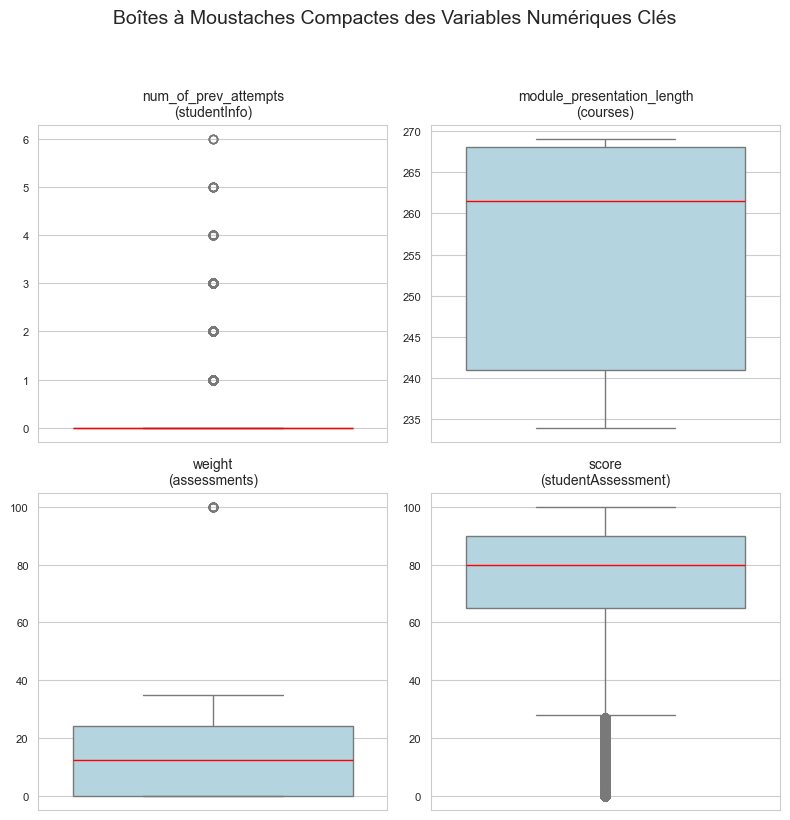

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Regroupement des DataFrames (assurez-vous que vos DataFrames sont chargés)
# ... (votre code de chargement des DataFrames) ...

# Liste des colonnes numériques pertinentes que nous voulons visualiser
# Nous allons les regrouper pour les afficher sur une seule figure
dataframes_to_plot = {
    'studentInfo': ['num_of_prev_attempts'],
    'courses': ['module_presentation_length'],
    'assessments': ['weight'], 
    'studentAssessment': ['score']
}

# Collecter toutes les colonnes dans une seule liste pour un subplot unique
all_cols_to_plot = []
plot_titles = [] # Pour garder une trace du DataFrame d'origine
for df_name, cols in dataframes_to_plot.items():
    df = dataframes[df_name]
    for col in cols:
        if col in df.columns:
            # Ajouter la série de données (colonne)
            all_cols_to_plot.append(df[col].rename(f'{col} ({df_name})').dropna())
            plot_titles.append(f'{col}\n({df_name})')

# Définir la grille (nombre de lignes et de colonnes)
# Exemple : 2 lignes et 2 colonnes (2x2) pour 4 graphiques
n_plots = len(all_cols_to_plot)
n_cols = 2  # Deux colonnes est un bon format compact
n_rows = int(np.ceil(n_plots / n_cols))

# Ajuster la taille de la figure pour être compacte (e.g., 8x8 pouces)
plt.figure(figsize=(n_cols * 4, n_rows * 4)) # 4x4 pouces par graphique

plt.suptitle("Boîtes à Moustaches Compactes des Variables Numériques Clés", fontsize=12, y=1.02)

for i, data_series in enumerate(all_cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Créer le boxplot vertical (par défaut), ajusté pour la compacité
    sns.boxplot(y=data_series, color='lightblue', medianprops={'color': 'red'})
    
    plt.title(plot_titles[i], fontsize=9)
    plt.ylabel('') # Retirer les étiquettes des axes Y pour gagner de la place
    plt.tick_params(axis='y', labelsize=8)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # Retirer les ticks X (pas nécessaires ici)

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajuster l'espacement
plt.show()

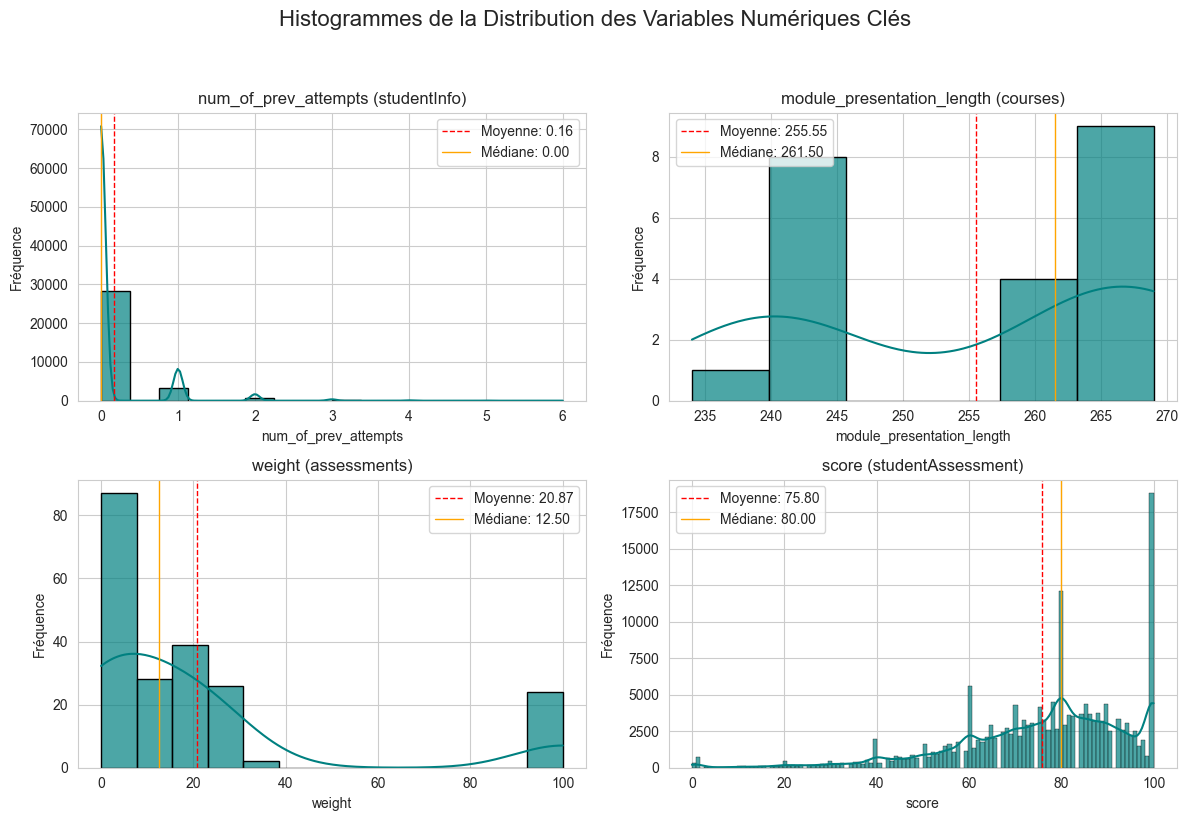

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuration de base pour la visualisation
sns.set_style("whitegrid")

# Définition des variables numériques clés à visualiser
dataframes_to_plot = {
    'studentInfo': ['num_of_prev_attempts'],
    'courses': ['module_presentation_length'],
    'assessments': ['weight'], 
    'studentAssessment': ['score']
}

# Collecter toutes les colonnes à tracer dans une seule liste
all_cols_to_plot = []
plot_titles = [] 
for df_name, cols in dataframes_to_plot.items():
    df = dataframes[df_name] # Assurez-vous que 'dataframes' est défini
    for col in cols:
        if col in df.columns:
            # Ajouter la série de données (colonne)
            all_cols_to_plot.append(df[col].dropna())
            plot_titles.append(f'{col} ({df_name})')

# --- Mise en place de la figure globale ---
n_plots = len(all_cols_to_plot)
n_cols = 2  # Deux colonnes pour un format compact
n_rows = int(np.ceil(n_plots / n_cols))

# Ajuster la taille de la figure pour être compacte (e.g., 6x4 pouces par graphique)
plt.figure(figsize=(n_cols * 6, n_rows * 4)) 

plt.suptitle("Histogrammes de la Distribution des Variables Numériques Clés", fontsize=16, y=1.02)

for i, data_series in enumerate(all_cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Construction de l'histogramme avec courbe KDE
    # bins='auto' laisse Seaborn déterminer le nombre optimal de barres
    sns.histplot(
        x=data_series, 
        kde=True, # Afficher la courbe d'estimation de la densité (Kernel Density Estimate)
        bins='auto', 
        color='teal', 
        edgecolor='black',
        alpha=0.7 
    )
    
    # Ajouter la Moyenne et la Médiane pour l'analyse
    mean_val = data_series.mean()
    median_val = data_series.median()
    
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Moyenne: {mean_val:.2f}')
    plt.axvline(median_val, color='orange', linestyle='-', linewidth=1, label=f'Médiane: {median_val:.2f}')
    
    plt.title(plot_titles[i], fontsize=12)
    plt.xlabel(data_series.name.split(' ')[0], fontsize=10) # Utiliser seulement le nom de la colonne
    plt.ylabel("Fréquence", fontsize=10)
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajuster l'espacement
plt.show()

### Merging data 

We are not going to lose any information when merging these too, we will use StudentRegisteration to gain extra information about date of registeration and unregisteration, courses will add the module length for each course

In [26]:
student_data = pd.merge(studentRegistration, studentInfo, on=['id_student', 'code_module', 'code_presentation'], how='inner')

In [27]:
student_data = pd.merge(student_data, courses, on=['code_module', 'code_presentation'], how='inner')

In [28]:
student_data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,28400,-53.0,NaN,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,268
3,AAA,2013J,31604,-52.0,NaN,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
4,AAA,2013J,32885,-176.0,NaN,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268


In [29]:
student_data.isna().sum()

code_module                       0
code_presentation                 0
id_student                        0
date_registration                45
date_unregistration           22521
gender                            0
region                            0
highest_education                 0
imd_band                       1111
age_band                          0
num_of_prev_attempts              0
studied_credits                   0
disability                        0
final_result                      0
module_presentation_length        0
dtype: int64

We will use inner merge to add the assesment details for each id_assessment, we are not going to lose any information

In [30]:
student_assesment_data = assessments.merge(studentAssessment,on=['id_assessment'],how="inner")

In [34]:
# one line : a student + a module + one session
student_data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,28400,-53.0,NaN,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,268
3,AAA,2013J,31604,-52.0,NaN,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
4,AAA,2013J,32885,-176.0,NaN,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268


In [32]:
student_assesment_data.isna().sum()

code_module             0
code_presentation       0
id_assessment           0
assessment_type         0
date                 2865
weight                  0
id_student              0
date_submitted          0
is_banked               0
score                 173
dtype: int64

In [33]:
student_assesment_data.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
